In [2]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from skimage.filters import threshold_mean, threshold_otsu

In [3]:
image1 = imread('Image1.png') #, as_gray=True)
#image1_Gray = rgb2gray(image1)
image1_Gray = imread('Image1.png', as_gray=True)

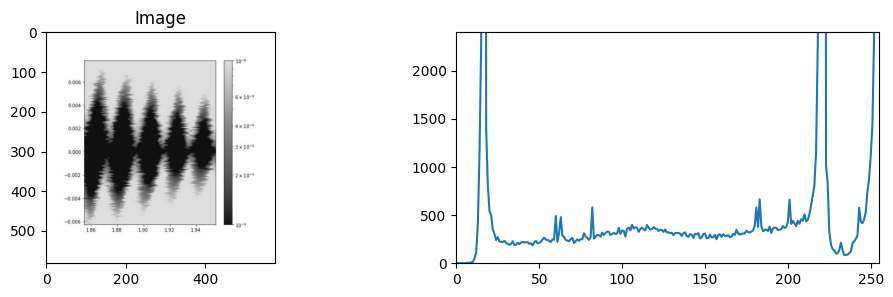

In [6]:
def histGrayScale(img, _xlim=255, _ylim=2400):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
    # to provide a better display we just change the plot display
    ax[1].set_xlim([0, _xlim])
    ax[1].set_ylim([0, _ylim])
histGrayScale(image1_Gray)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def auto_threshold(image):
    # Sélectionner une ligne de niveaux (par exemple, la ligne médiane)
    ligne_niveaux = image[image.shape[0] // 2, :]
    
    # Calculer un seuil à partir de la ligne de niveaux (par exemple, la valeur médiane)
    seuil = np.median(ligne_niveaux)
    
    # Définir une marge pour les seuils min et max (par exemple, 10%)
    margin = 0.1
    
    # Calculer les seuils min et max
    min_value = max(0, seuil - seuil * margin)
    max_value = min(255, seuil + seuil * margin)
    
    return min_value, max_value


(array([[[   0,    0]],

       [[   0,  799]],

       [[1199,  799]],

       [[1199,    0]]], dtype=int32),)


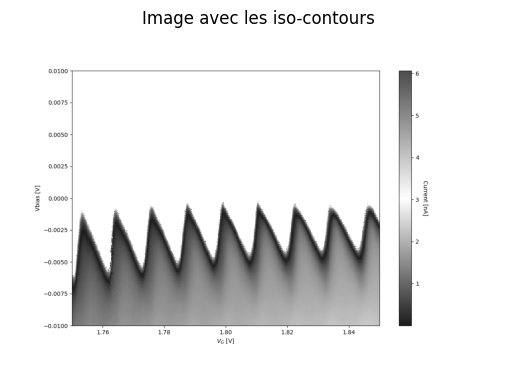

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveau de gris
image = cv2.imread("R_.png", cv2.IMREAD_GRAYSCALE)

# Binariser l'image (facultatif)
_, binary_image = cv2.threshold(image, 95, 200, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Trouver les contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur une copie de l'image originale
contour_image = np.copy(image)
#cv2.drawContours(contour_image, contours, -1, (205, 255, 0), 2)

# Afficher l'image avec les contours et les rectangles englobants
print(contours)
plt.imshow(contour_image, cmap='gray')
plt.title("Image avec les iso-contours")
plt.axis('off')
plt.show()



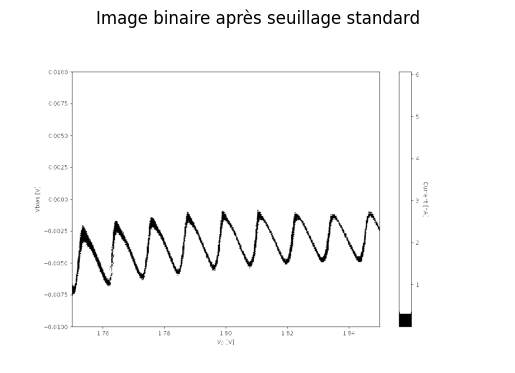

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveau de gris
image = contour_image

# Sélectionner une ligne de niveaux (par exemple, la ligne médiane)
ligne_niveaux = image[image.shape[0] // 2, :]

# Calculer un seuil à partir de la ligne de niveaux (par exemple, la valeur médiane)
seuil = 60

# Binariser l'image en utilisant le seuil calculé
_, binary_image = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)


plt.imshow(binary_image, cmap='gray')
plt.title("Image binaire après seuillage standard")
plt.axis('off')


plt.show()



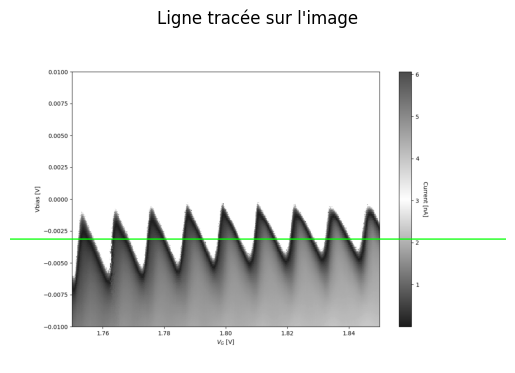

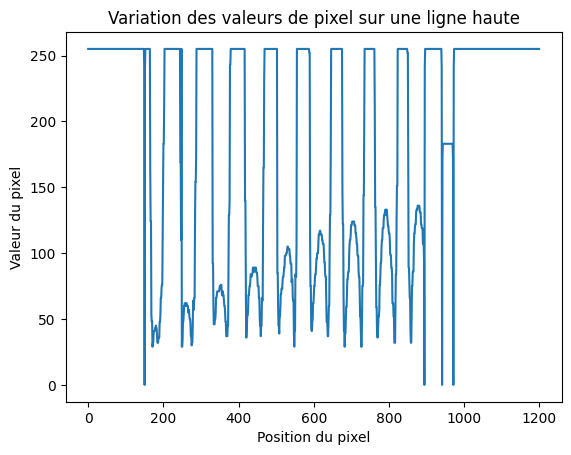

In [63]:

# Charger l'image en niveau de gris
image = contour_image

# Sélectionner une ligne un peu plus haute que la ligne médiane de l'image
y_position = (image.shape[1]//2) - 100 # Ajustez cette valeur selon la position verticale désirée
ligne_haute = image[y_position, :]

# Récupérer les positions des pixels le long de la ligne
positions = np.arange(len(ligne_haute))

# Tracer la ligne sur l'image
image_with_line = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convertir en image couleur pour dessiner la ligne
cv2.line(image_with_line, (0, y_position), (image.shape[1]-1, y_position), (0, 255, 0), 2)  # Dessiner la ligne verte

# Afficher l'image avec la ligne tracée
plt.imshow(image_with_line, cmap='gray')
plt.title("Ligne tracée sur l'image")
plt.axis('off')
plt.show()

# Afficher la variation des valeurs de pixel sur un graphique
plt.plot(positions, ligne_haute)
plt.title("Variation des valeurs de pixel sur une ligne haute")
plt.xlabel("Position du pixel")
plt.ylabel("Valeur du pixel")
plt.show()



In [40]:
img = cv2.imread('I_.jpg', cv2.IMREAD_GRAYSCALE)
ret,thresh = cv2.threshold(img,0,95,1)
contours,_ = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print( M )

IndexError: tuple index out of range

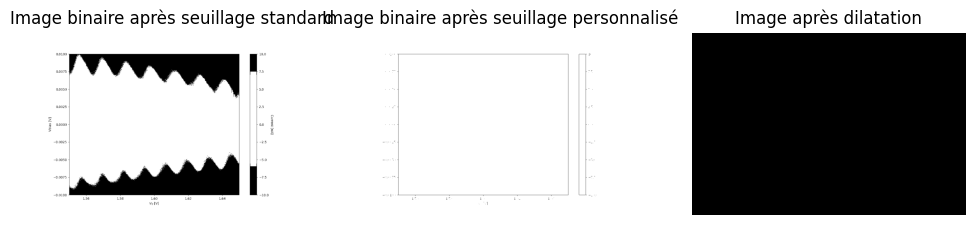

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveau de gris
image = cv2.imread("K_.png", cv2.IMREAD_GRAYSCALE)

# Sélectionner une ligne de niveaux (par exemple, la ligne médiane)
ligne_niveaux = image[image.shape[0] // 2, :]

# Calculer un seuil à partir de la ligne de niveaux (par exemple, la valeur médiane)
seuil = 60

# Binariser l'image en utilisant le seuil calculé
_, binary_image = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)

# Seuillage personnalisé avec les valeurs min et max
min_value = 0
max_value = 95
_, binary_image_custom = cv2.threshold(image, min_value, max_value, cv2.THRESH_BINARY)

# Définir le kernel pour l'érosion et la dilatation
kernel = np.ones((5, 5), np.uint8)

# Effectuer l'érosion
erosion_image = cv2.erode(binary_image_custom, kernel, iterations=1)

# Effectuer la dilatation
dilation_image = cv2.dilate(binary_image_custom, kernel, iterations=1)


# Afficher les images résultantes
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Image binaire après seuillage standard")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_image_custom, cmap='gray')
plt.title("Image binaire après seuillage personnalisé")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(erosion_image, cmap='gray')
plt.title("Image après érosion")
plt.axis('off')

plt.subplot(1, 3, 3) # Maintenant, c'est 3 au lieu de 2
plt.imshow(dilation_image, cmap='gray')
plt.title("Image après dilatation")
plt.axis('off')



plt.show()



### ouverture fermeture

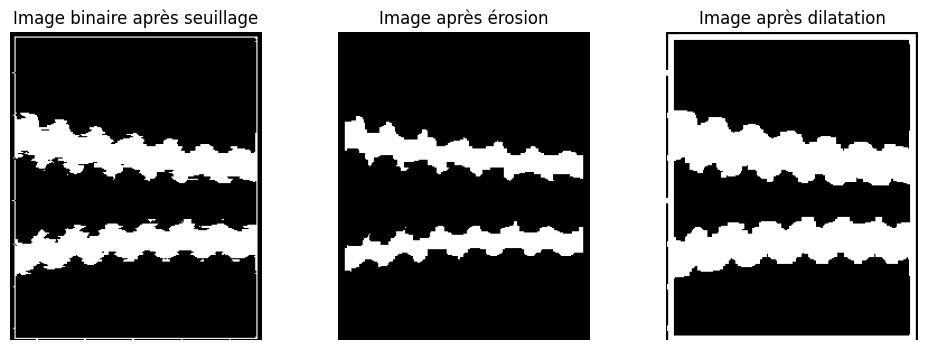

In [14]:
# Charger l'image en niveau de gris
image = cv2.imread("Bad_image3_crop.png", cv2.IMREAD_GRAYSCALE)

# Seuillage personnalisé avec les valeurs min et max
min_value = 65
max_value = 165

# Binariser l'image en utilisant le seuil personnalisé
binary_image_custom = cv2.inRange(image, min_value, max_value)


# Définir le kernel pour l'érosion et la dilatation
kernel = np.ones((5, 5), np.uint8)

# Effectuer l'érosion
erosion_image = cv2.erode(binary_image_custom, kernel, iterations=1)

# Effectuer la dilatation
dilation_image = cv2.dilate(binary_image_custom, kernel, iterations=1)

# Afficher les images résultantes
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(binary_image_custom, cmap='gray')
plt.title("Image binaire après seuillage")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(erosion_image, cmap='gray')
plt.title("Image après érosion")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilation_image, cmap='gray')
plt.title("Image après dilatation")
plt.axis('off')

plt.show()


In [15]:
# Calculer le nombre de pixels blancs dans l'image binaire
nb_pixels_blancs = cv2.countNonZero(binary_image_custom)
# Afficher le nombre de pixels blancs
print("Nombre de pixels blancs :", nb_pixels_blancs)
# Calculer le nombre total de pixels dans l'image
nb_pixels_total = binary_image_custom.shape[0] * binary_image_custom.shape[1]

# Calculer le pourcentage de pixels blancs
pourcentage_pixels_blancs = (nb_pixels_blancs / nb_pixels_total) * 100

# Afficher le pourcentage de pixels blancs
print("Pourcentage de pixels blancs :", pourcentage_pixels_blancs)


Nombre de pixels blancs : 13390
Pourcentage de pixels blancs : 21.64040404040404


: 

In [1]:
# Calculer le nombre de pixels blancs dans l'image binaire
nb_pixels_blancs = cv2.countNonZero(binary_image_custom)
# Afficher le nombre de pixels blancs
print("Nombre de pixels blancs :", nb_pixels_blancs)

NameError: name 'cv2' is not defined

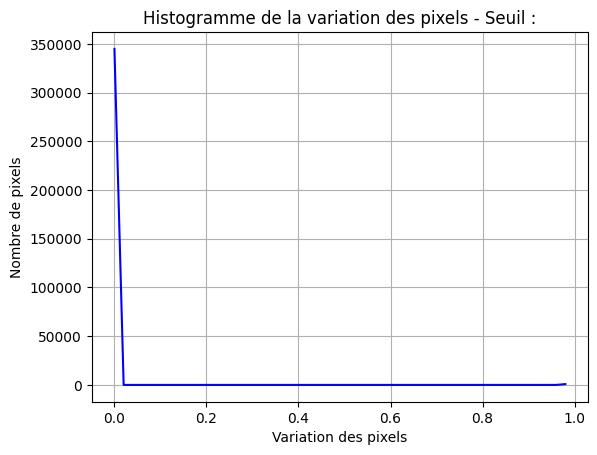

In [17]:
# Calculer la différence absolue entre chaque pixel et son voisin dans chaque direction
diff_x = np.abs(np.diff(binary_image, axis=1))
diff_y = np.abs(np.diff(binary_image, axis=0))

# Concaténer les différences en une seule matrice
diff_total = np.concatenate((diff_x.flatten(), diff_y.flatten()))

# Calculer l'histogramme de la variation des pixels
hist, bins = np.histogram(diff_total, bins=50, range=(0, 1))

# Afficher l'histogramme
plt.figure()
plt.plot(bins[:-1], hist, color='blue')
plt.title(f"Histogramme de la variation des pixels - Seuil :")
plt.xlabel("Variation des pixels")
plt.ylabel("Nombre de pixels")
plt.grid(True)
plt.show()

KeyboardInterrupt: 

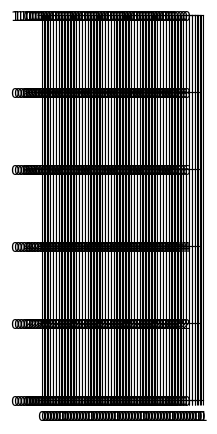

In [59]:

# Charger l'image en niveau de gris
image = cv2.imread("Bad_image1.png", cv2.IMREAD_GRAYSCALE)
# Définir les lignes de niveaux à utiliser
lignes_indices = image.shape[0] //2  # Par exemple, lignes à 1/4, 1/2 et 3/4 de la hauteur

# Calculer un seuil pour chaque ligne de niveaux
seuil = np.median(image[lignes_indices, :])

# Binariser l'image en utilisant chaque seuil calculé
binary_images = cv2.threshold(image, seuil, 255, cv2.THRESH_BINARY)[1]

# Afficher les images binaires
fig, axs = plt.subplots(1, len(binary_images), figsize=(15, 5))
plt.imshow(binary_image, cmap='gray')
plt.set_title(f"Seuil :")
plt.axis('off')
plt.show()



Erosion
Dilatation

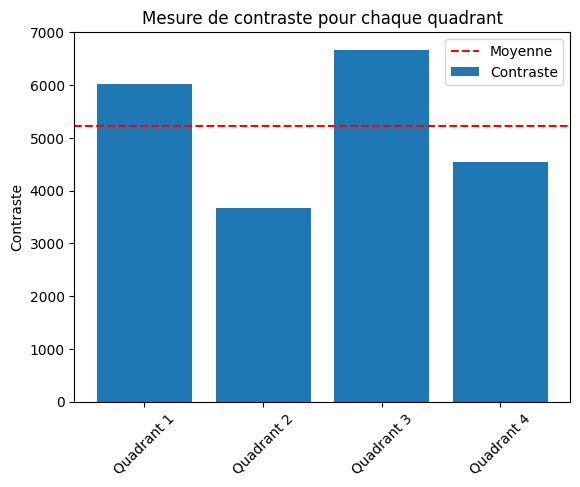

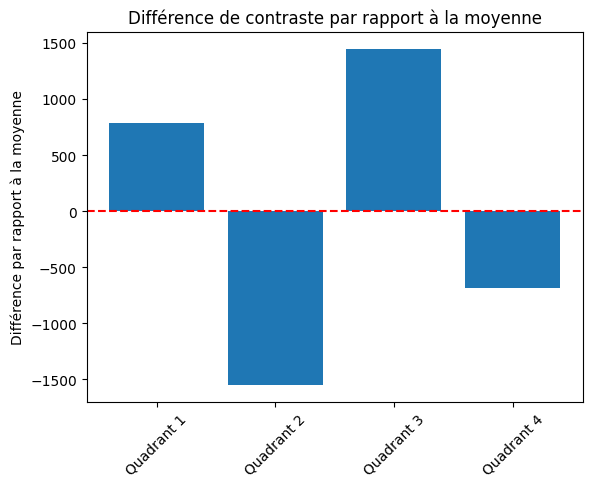

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveau de gris
image = cv2.imread("Image1.png", cv2.IMREAD_GRAYSCALE)

# Diviser l'image en plusieurs régions d'intérêt (par exemple, quadrants)
height, width = image.shape[:2]
quadrant1 = image[:height//2, :width//2]
quadrant2 = image[:height//2, width//2:]
quadrant3 = image[height//2:, :width//2]
quadrant4 = image[height//2:, width//2:]

# Calculer la variance de chaque quadrant comme mesure de contraste
contrastes = [
    np.var(quadrant1),
    np.var(quadrant2),
    np.var(quadrant3),
    np.var(quadrant4)
]

# Comparaison des moyennes
moyenne_contraste = np.mean(contrastes)
diff_contraste = contrastes - moyenne_contraste

# Affichage des résultats
labels = ['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4']
plt.bar(labels, contrastes, label='Contraste')
plt.axhline(y=moyenne_contraste, color='r', linestyle='--', label='Moyenne')
plt.xticks(rotation=45)
plt.ylabel('Contraste')
plt.title('Mesure de contraste pour chaque quadrant')
plt.legend()
plt.show()

# Affichage de la différence par rapport à la moyenne
plt.bar(labels, diff_contraste)
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Différence par rapport à la moyenne')
plt.title('Différence de contraste par rapport à la moyenne')
plt.show()


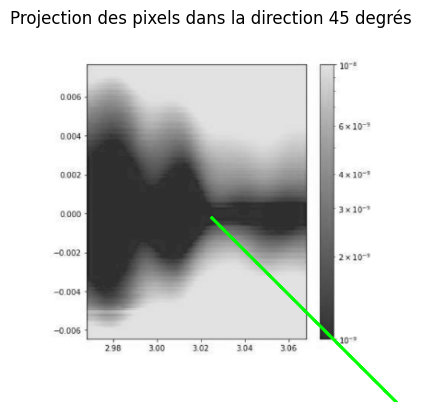

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveau de gris
image = cv2.imread("Bad_image1.png", cv2.IMREAD_GRAYSCALE)

# Définir l'angle de la direction dans laquelle vous souhaitez projeter les pixels (en degrés)
angle_degrees = 45

# Convertir l'angle en radians
angle_radians = np.deg2rad(angle_degrees)

# Calculer les coordonnées du vecteur de direction
dx = np.cos(angle_radians)
dy = np.sin(angle_radians)

# Calculer la longueur de la diagonale de l'image pour s'assurer que la projection couvre toute l'image
diagonal_length = np.sqrt(image.shape[0]**2 + image.shape[1]**2)

# Définir les points de début et de fin de la ligne pour la projection
start_point = (int(image.shape[1] // 2), int(image.shape[0] // 2))  # Point de départ au centre de l'image
end_point = (int(start_point[0] + diagonal_length * dx), int(start_point[1] + diagonal_length * dy))  # Point de fin

# Dessiner une ligne pour représenter la direction de projection
image_with_line = cv2.line(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), start_point, end_point, (0, 255, 0), 2)

# Afficher l'image avec la ligne de projection
plt.imshow(cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB))
plt.title("Projection des pixels dans la direction {} degrés".format(angle_degrees))
plt.axis('off')
plt.show()


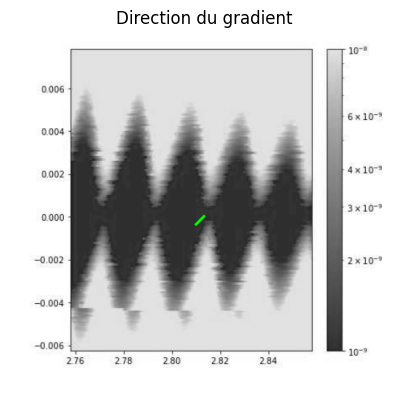

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveau de gris
image = cv2.imread("Image2.png", cv2.IMREAD_GRAYSCALE)

# Calculer les gradients horizontaux et verticaux à l'aide des opérateurs de Sobel
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient horizontal
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient vertical

# Calculer l'angle du gradient à partir des gradients horizontaux et verticaux
gradient_angle = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

# Projeter les pixels dans la direction du gradient
start_point = (int(image.shape[1] // 2), int(image.shape[0] // 2))  # Point de départ au centre de l'image
end_point = (int(start_point[0] + gradient_x[start_point[1], start_point[0]]), 
             int(start_point[1] + gradient_y[start_point[1], start_point[0]]))  # Point de fin

# Dessiner une ligne pour représenter la direction du gradient
image_with_gradient_line = cv2.line(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), start_point, end_point, (0, 255, 0), 2)

# Afficher l'image avec la ligne de direction du gradient
plt.imshow(cv2.cvtColor(image_with_gradient_line, cv2.COLOR_BGR2RGB))
plt.title("Direction du gradient")
plt.axis('off')
plt.show()


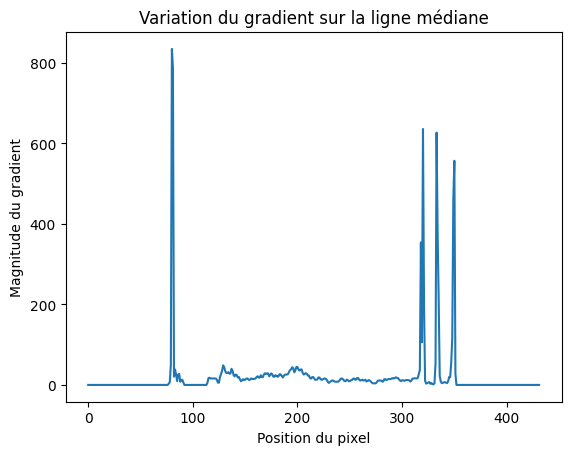

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveau de gris
image = cv2.imread("Bad_image1.png", cv2.IMREAD_GRAYSCALE)

# Calculer les gradients horizontaux et verticaux à l'aide des opérateurs de Sobel
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient horizontal
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient vertical

# Calculer la magnitude du gradient
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Récupérer la position des pixels dans l'image
positions = np.arange(image.shape[1])

# Afficher la variation du gradient sur un graphique
plt.plot(positions, gradient_magnitude[image.shape[0] // 3, :])
plt.title("Variation du gradient sur la ligne médiane")
plt.xlabel("Position du pixel")
plt.ylabel("Magnitude du gradient")
plt.show()


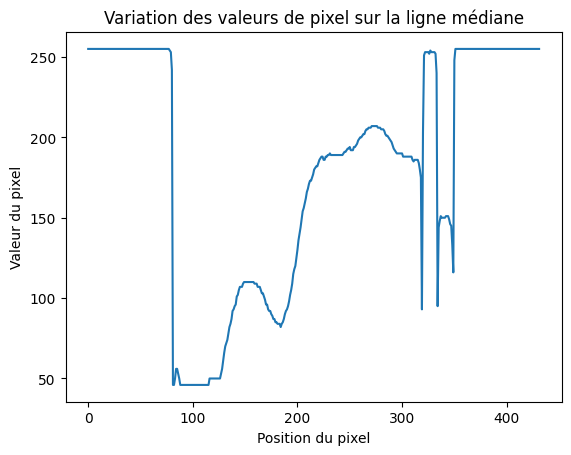

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveau de gris
image = cv2.imread("Bad_image1.png", cv2.IMREAD_GRAYSCALE)

# Sélectionner la ligne médiane de l'image
ligne = image[image.shape[0]//3, :]

# Récupérer les positions des pixels le long de la ligne
positions = np.arange(len(ligne))

# Afficher la variation des valeurs de pixel sur un graphique
plt.plot(positions, ligne)
plt.title("Variation des valeurs de pixel sur la ligne médiane")
plt.xlabel("Position du pixel")
plt.ylabel("Valeur du pixel")
plt.show()


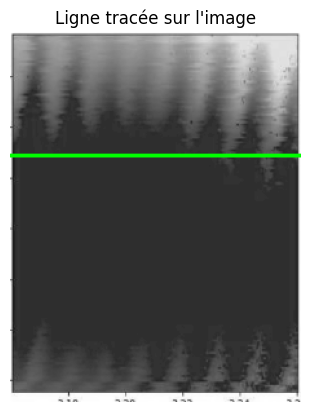

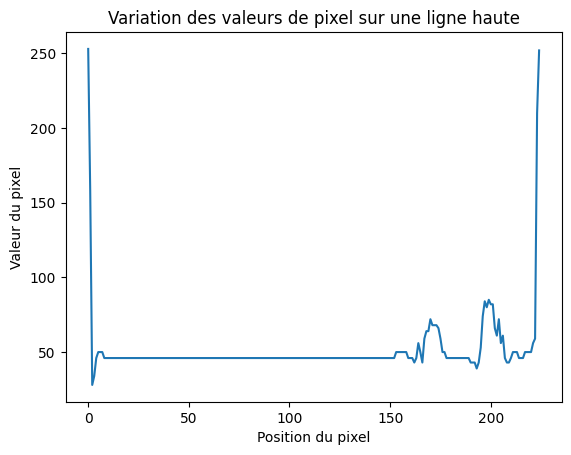

In [152]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveau de gris
image = cv2.imread("Bad_image2_crop.png", cv2.IMREAD_GRAYSCALE)

# Sélectionner une ligne un peu plus haute que la ligne médiane de l'image
y_position = image.shape[0] // 3  # Ajustez cette valeur selon la position verticale désirée
ligne_haute = image[y_position, :]

# Récupérer les positions des pixels le long de la ligne
positions = np.arange(len(ligne_haute))

# Tracer la ligne sur l'image
image_with_line = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convertir en image couleur pour dessiner la ligne
cv2.line(image_with_line, (0, y_position), (image.shape[1]-1, y_position), (0, 255, 0), 2)  # Dessiner la ligne verte

# Afficher l'image avec la ligne tracée
plt.imshow(image_with_line, cmap='gray')
plt.title("Ligne tracée sur l'image")
plt.axis('off')
plt.show()

# Afficher la variation des valeurs de pixel sur un graphique
plt.plot(positions, ligne_haute)
plt.title("Variation des valeurs de pixel sur une ligne haute")
plt.xlabel("Position du pixel")
plt.ylabel("Valeur du pixel")
plt.show()



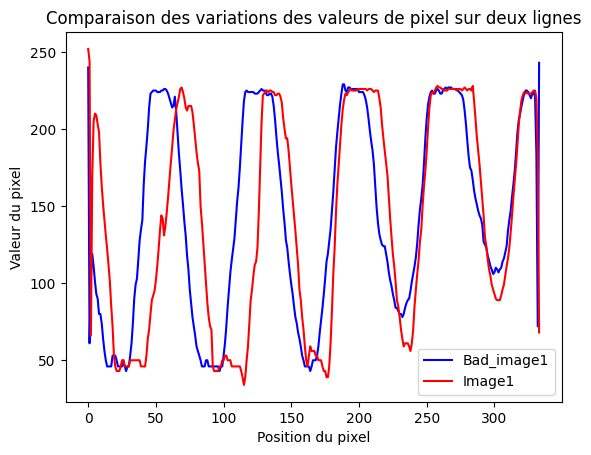

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger la première image en niveau de gris
image1 = cv2.imread("Image2_crop.png", cv2.IMREAD_GRAYSCALE)

# Sélectionner une ligne un peu plus haute que la ligne médiane de la première image
y_position1 = image1.shape[0] // 3  # Ajustez cette valeur selon la position verticale désirée
ligne_haute1 = image1[y_position1, :]


# Charger la deuxième image en niveau de gris
image2 = cv2.imread("Image1_crop.png", cv2.IMREAD_GRAYSCALE)

# Sélectionner une ligne un peu plus haute que la ligne médiane de la deuxième image
y_position2 = image2.shape[0] // 3  # Ajustez cette valeur selon la position verticale désirée
ligne_haute2 = image2[y_position2, :]


# Redimensionner les tableaux pour avoir la même longueur que le plus petit tableau
min_length = min(len(ligne_haute1), len(ligne_haute2))
ligne_haute1 = ligne_haute1[:min_length]
ligne_haute2 = ligne_haute2[:min_length]
positions2 = np.arange(len(ligne_haute2))
positions1 = np.arange(len(ligne_haute1))
# Tracer les deux graphes sur le même graphique
plt.plot(positions1, ligne_haute1, label="Bad_image1", color="blue")  # Utilisation de la couleur bleue pour la première image
plt.plot(positions2, ligne_haute2, label="Image1", color="red")  # Utilisation de la couleur rouge pour la deuxième image

# Ajouter des titres et des légendes
plt.title("Comparaison des variations des valeurs de pixel sur deux lignes")
plt.xlabel("Position du pixel")
plt.ylabel("Valeur du pixel")
plt.legend()  # Afficher la légende

# Afficher le graphique
plt.show()


In [110]:
correlation = np.corrcoef(ligne_haute1, ligne_haute2)[0, 1]
print("Corrélation entre les deux dérivées :", correlation)
distance = np.linalg.norm(ligne_haute1 - ligne_haute2)
print("Distance euclidienne entre les deux dérivées :", distance)

Corrélation entre les deux dérivées : 0.5992054105083899
Distance euclidienne entre les deux dérivées : 2842.9389722609244


Moyenne : 176.5377777777778
Variance : 1197.9374617283952
Skewness : -0.1368883351012566
Kurtosis : -0.5667051158922694
Fréquence dominante : 8
Énergie : 25217
Entropie : 5.396387377596573
Pente : 0.41972608512431536


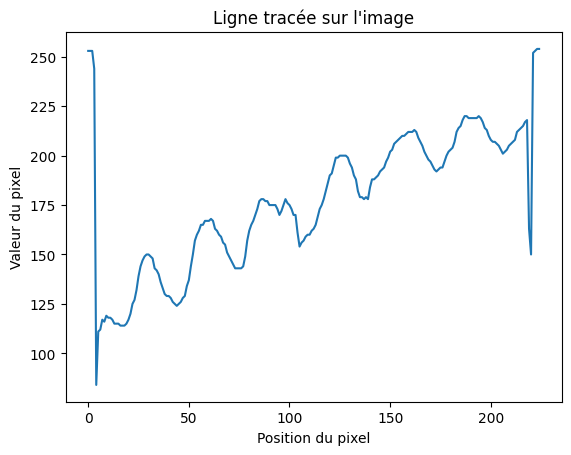

In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
from scipy.stats import entropy
from sklearn.linear_model import LinearRegression

# Charger une image en niveau de gris
image = cv2.imread("Bad_image3_crop.png", cv2.IMREAD_GRAYSCALE)

# Sélectionner une ligne un peu plus haute que la ligne médiane de l'image
y_position = image.shape[0] // 3
ligne = image[y_position, :]
# Calculer la dérivée du graphe représentant la variation des valeurs de pixel
#ligne = np.gradient(ligne)

# Calculer la moyenne des valeurs de pixel
moyenne = np.mean(ligne)

# Calculer la variance des valeurs de pixel
variance = np.var(ligne)

# Calculer l'asymétrie des valeurs de pixel
skewness = skew(ligne)

# Calculer la kurtosis des valeurs de pixel
kurt = kurtosis(ligne)

# Identifier les pics (fréquences dominantes)
"""Ce code vise à identifier les pics dans une ligne de valeurs de pixels,
ce qui peut être interprété comme une variation de l'intensité dans une direction donnée dans une image. 
Les pics correspondent généralement à des changements brusques ou à des caractéristiques significatives dans cette direction."""
peaks, _ = find_peaks(ligne, distance=20)  # distance entre les pics
freq_dominante = len(peaks)

# Calculer l'énergie des valeurs de pixel
energie = np.sum(ligne ** 2)

# Calculer l'entropie des valeurs de pixel
"""Une image avec une entropie élevée contient beaucoup d'informations
 différentes et peut être considérée comme plus complexe ou plus "bruitée", 
tandis qu'une image avec une entropie faible contient moins d'informations 
et peut être plus uniforme ou plus prévisible"""
entropie = entropy(ligne)

# Calculer la pente de la ligne
positions = np.arange(len(ligne)).reshape(-1, 1)
regression = LinearRegression().fit(positions, ligne)
pente = regression.coef_[0]

# Afficher les résultats
print("Moyenne :", moyenne)
print("Variance :", variance)
print("Skewness :", skewness)
print("Kurtosis :", kurt)
print("Fréquence dominante :", freq_dominante)
print("Énergie :", energie)
print("Entropie :", entropie)
print("Pente :", pente)

# Tracer la ligne sur le graphique
plt.plot(ligne)
plt.title("Ligne tracée sur l'image")
plt.xlabel("Position du pixel")
plt.ylabel("Valeur du pixel")
plt.show()


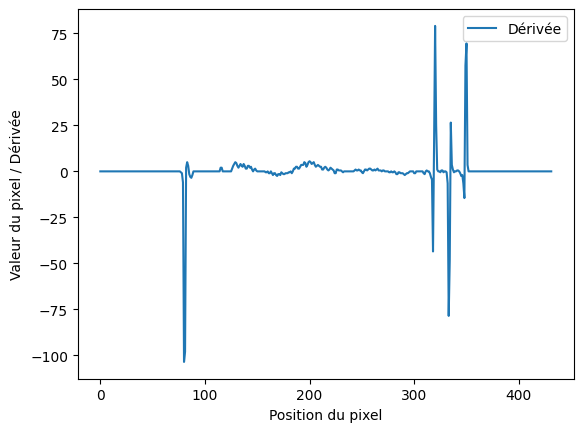

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Calculer la dérivée du graphe représentant la variation des valeurs de pixel
derivee = np.gradient(ligne_haute)

# Afficher la variation des valeurs de pixel sur un graphique
#plt.plot(positions, ligne_haute, label="Valeurs de pixel")
plt.plot(positions, derivee, label="Dérivée")
#plt.title("Variation des valeurs de pixel sur une ligne haute et sa dérivée")
plt.xlabel("Position du pixel")
plt.ylabel("Valeur du pixel / Dérivée")
plt.legend()
plt.show()


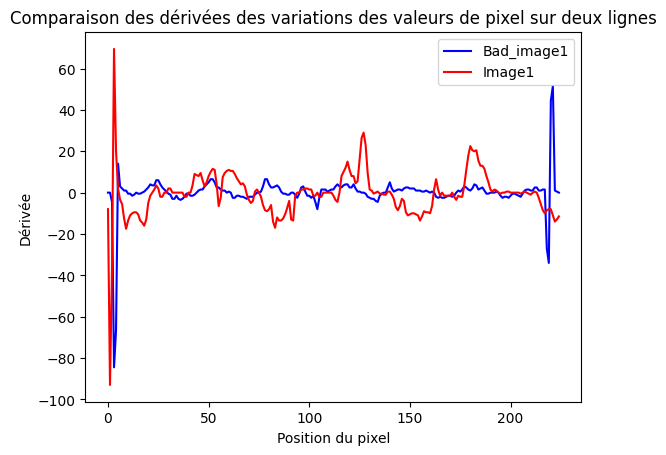

In [135]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger la première image en niveau de gris
image1 = cv2.imread("Bad_image3_crop.png", cv2.IMREAD_GRAYSCALE)

# Sélectionner une ligne un peu plus haute que la ligne médiane de la première image
y_position1 = image1.shape[0] // 3  # Ajustez cette valeur selon la position verticale désirée
ligne_haute1 = image1[y_position1, :]

# Calculer la dérivée du graphe représentant la variation des valeurs de pixel pour la première image
derivee1 = np.gradient(ligne_haute1)

# Charger la deuxième image en niveau de gris
image2 = cv2.imread("Image1_crop.png", cv2.IMREAD_GRAYSCALE)

# Sélectionner une ligne un peu plus haute que la ligne médiane de la deuxième image
y_position2 = image2.shape[0] // 3  # Ajustez cette valeur selon la position verticale désirée
ligne_haute2 = image2[y_position2, :]

# Calculer la dérivée du graphe représentant la variation des valeurs de pixel pour la deuxième image
derivee2 = np.gradient(ligne_haute2)

# Redimensionner les tableaux pour avoir la même longueur que le plus petit tableau
min_length = min(len(derivee1), len(derivee2))
derivee1 = derivee1[:min_length]
derivee2 = derivee2[:min_length]

# Récupérer les positions des pixels le long de chaque ligne
positions = np.arange(min_length)

# Tracer les deux graphes sur le même graphique
plt.plot(positions, derivee1, label="Bad_image1", color="blue")  # Utilisation de la couleur bleue pour la première image
plt.plot(positions, derivee2, label="Image1", color="red")  # Utilisation de la couleur rouge pour la deuxième image

# Ajouter des titres et des légendes
plt.title("Comparaison des dérivées des variations des valeurs de pixel sur deux lignes")
plt.xlabel("Position du pixel")
plt.ylabel("Dérivée")
plt.legend()  # Afficher la légende

# Afficher le graphique
plt.show()


In [131]:
correlation = np.corrcoef(derivee1, derivee2)[0, 1]
print("Corrélation entre les deux dérivées :", correlation)
distance = np.linalg.norm(derivee1 - derivee2)
print("Distance euclidienne entre les deux dérivées :", distance)



Corrélation entre les deux dérivées : 0.31346980030149485
Distance euclidienne entre les deux dérivées : 226.64950915455344


In [132]:
pearson_similarity = np.corrcoef(derivee1, derivee2)[0, 1]
print("Coefficient de similarité de Pearson :", pearson_similarity)


Coefficient de similarité de Pearson : 0.31346980030149485


In [133]:
mean_derivee1 = np.mean(derivee1)
mean_derivee2 = np.mean(derivee2)
cross_correlation = np.mean((derivee1 - mean_derivee1) * (derivee2 - mean_derivee2)) / (np.std(derivee1) * np.std(derivee2))
print("Coefficient de corrélation croisée :", cross_correlation)


Coefficient de corrélation croisée : 0.3134698003014944


In [134]:
manhattan_distance = np.sum(np.abs(derivee1 - derivee2))
print("Distance de Manhattan :", manhattan_distance)

Distance de Manhattan : 1840.0


["D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\A_.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\B_.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\CD_pc1_exp_10.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\CD_pc1_exp_6.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\CD_pc1_exp_7.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\CD_pc1_exp_8.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\CD_pc1_exp_9.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\CD_pc2_exp_2.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\CD_pc2_exp_3.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\CD_pc2_exp_4.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\CD_pc3_exp_10.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d

C:\Users\Elom O\AppData\Local\Temp\ipykernel_7916\701183400.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.abs(np.log(z)), interpolation='nearest',cmap=plt.cm.bwr,extent=[np.min(x), np.max(x), np.min(y), np.max(y)], aspect='auto')
C:\Users\Elom O\AppData\Local\Temp\ipykernel_7916\701183400.py:57: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.abs(np.log(z)), interpolation='nearest',cmap=plt.cm.bwr,extent=[np.min(x), np.max(x), np.min(y), np.max(y)], aspect='auto')


V_.h5 as fail


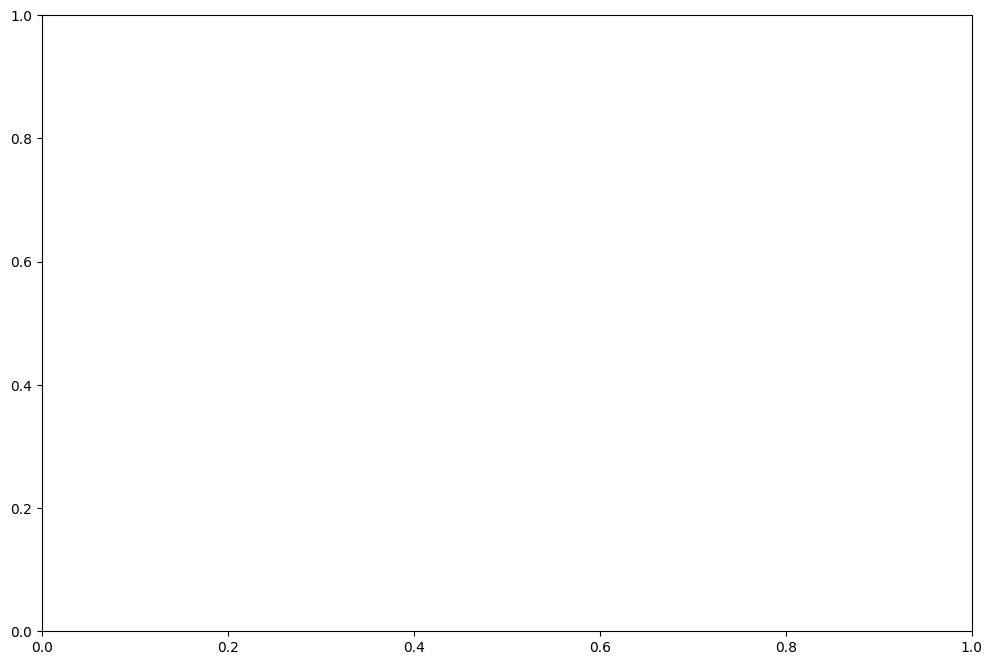

In [12]:
# Generation de plots de diamands de coulomb a partir de fichier h5

import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

plt.close('all')

# path à changer 
folder = r"D:\\me\\QUOBLY"
folder += r"\\Stage_analyse_d'image\\Stage_analyse_d'image\\"

plot_folder = os.path.join(folder, 'plot')

# Créer le dossier plot s'il n'existe pas
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

files_list = glob.glob(folder+"*.h5")
print(files_list)
#Cle utiliser dans tout les h5
used_keys = ['Initial_move', 'Initial_positions', 'Param_list', 'configure', 'data']
keys_reservoir = ['D','S','bias']
file_name = folder+ 'B_.h5' 

for file_name in files_list :
    try : 
        aux = h5py.File(file_name, 'r')

        #Trouver la clé correspondant à Vg
        unused_keys = [key for key in aux if key not in used_keys]
        current_key = list(aux["data"].keys())[0]
        if unused_keys[0] in keys_reservoir :
            current = np.array(aux["data"][current_key]).T
            Vbias = np.asarray(aux[unused_keys[0]])
            Vg = np.array(aux["configure"]["fast_sequence"])[-1][3:-1]
        else :
            Vg = np.asarray(aux[unused_keys[0]])
            Vbias = np.array(aux["configure"]["fast_sequence"])[-1][3:-1]
            current = np.array(aux["data"][current_key])

        
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111)

        x = Vg  
        y = Vbias  
        z = current 
        
        # Y a des bugs dans certains fichier car valeurs infinis
        z = np.nan_to_num(z)
        z[z < -10] = -10
        z[z > 10] = 10

        plt.imshow(np.abs(np.log(z)), interpolation='nearest',cmap=plt.cm.bwr,extent=[np.min(x), np.max(x), np.min(y), np.max(y)], aspect='auto')

        plt.xlabel(f'$V_G$ [V]')
        plt.ylabel('Vbias [V]')
        plt.colorbar().set_label('Current [nA]', rotation=270, labelpad=15)

        nom_fichier_plot = file_name.split('\\')[-1][:-3]
        chemin_fichier_plot = os.path.join(plot_folder, nom_fichier_plot)
        plt.savefig(chemin_fichier_plot)
        plt.close()
    except : 
        print(file_name.split('\\')[-1], 'as fail')
plt.show()


In [13]:
# Generation de plots de diamands de coulomb a partir de fichier h5

import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

plt.close('all')

# path à changer 
folder = r"D:\\me\\QUOBLY"
folder += r"\\Stage_analyse_d'image\\Stage_analyse_d'image\\plot\\"

plot_folder = os.path.join(folder, 'plot')

# Créer le dossier plot s'il n'existe pas
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

files_list = glob.glob(folder+"*.h5")
print(files_list)
#Cle utiliser dans tout les h5
used_keys = ['Initial_move', 'Initial_positions', 'Param_list', 'configure', 'data']
keys_reservoir = ['D','S','bias']
file_name = folder+ 'B_.h5' 

for file_name in files_list :
    try : 
        aux = h5py.File(file_name, 'r')

        #Trouver la clé correspondant à Vg
        unused_keys = [key for key in aux if key not in used_keys]
        current_key = list(aux["data"].keys())[0]
        if unused_keys[0] in keys_reservoir :
            current = np.array(aux["data"][current_key]).T
            Vbias = np.asarray(aux[unused_keys[0]])
            Vg = np.array(aux["configure"]["fast_sequence"])[-1][3:-1]
        else :
            Vg = np.asarray(aux[unused_keys[0]])
            Vbias = np.array(aux["configure"]["fast_sequence"])[-1][3:-1]
            current = np.array(aux["data"][current_key])

        
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111)

        x = Vg  
        y = Vbias  
        z = current 
        
        # Y a des bugs dans certains fichier car valeurs infinis
        z = np.nan_to_num(z)
        z[z < -10] = -10
        z[z > 10] = 10

        

        plt.imshow(z, interpolation='nearest',cmap=plt.cm.jet,extent=[np.min(x), np.max(x), np.min(y), np.max(y)], aspect='auto')

        plt.xlabel(f'$V_G$ [V]')
        plt.ylabel('Vbias [V]')
        plt.colorbar().set_label('Current [nA]', rotation=270, labelpad=15)

        nom_fichier_plot = file_name.split('\\')[-1][:-3]
        chemin_fichier_plot = os.path.join(plot_folder, nom_fichier_plot)
        plt.savefig(chemin_fichier_plot)
        plt.close()
    except : 
        print(file_name.split('\\')[-1], 'as fail')
plt.show()



["D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\\\plot\\A_.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\\\plot\\B_.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\\\plot\\CD_pc1_exp_6.h5", "D:\\\\me\\\\QUOBLY\\\\Stage_analyse_d'image\\\\Stage_analyse_d'image\\\\plot\\C_.h5"]
